**Problem Statement Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, and it will be a different story.**

To solve this problem, we have been provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities, using which we aim to build a model which predicts the prices of the flights using various input features.

The Dataset Link for the dataset — https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. We will use Regression techniques here, since the predicted output will be a continuous value.

Following is the description of features available in the dataset –

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the **ticket**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [8]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] =df['Date_of_Journey'].str.split('/').str[2]

In [9]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [11]:
df['Date'] =df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [13]:
del df['Date_of_Journey']

In [14]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [18]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [21]:
 df['Arrival_min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [23]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)

In [24]:
del df['Arrival_Time']

In [25]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [27]:
df['Dep_Time_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_min'] = df['Dep_Time'].str.split(':').str[1]

In [28]:
df['Dep_Time_hour'] = df['Dep_Time_hour'].astype(int)
df['Dep_Time_min'] = df['Dep_Time_min'].astype(int)

In [29]:
del df['Dep_Time']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Dep_Time_hour    10683 non-null  int64 
 14  Dep_Time_min     10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [31]:
del df['Route']

In [41]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25m


In [43]:
df['Duration_min'] = df['Duration_min'].str.split('m').str[0]

In [44]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [55]:
 del df['Duration_hour']

In [56]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,25


In [67]:
	df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [68]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,50,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,25,7


In [72]:
del df['Duration_hour']

In [73]:
del df['Duration_min']

In [74]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [75]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('h').str[0]

In [76]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25m


In [77]:
del df['Duration']

In [78]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25m


In [89]:
for i in df['Duration_min']:
  if type(i) == str:
    df['Duration_min'] = df['Duration_min'].replace(i,0)

In [90]:
for i in df['Duration_hour']:
  if type(i) == str:
    df['Duration_hour'] = df['Duration_hour'].replace(i,0)

In [91]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

In [93]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int64 
 7   Month            10683 non-null  int64 
 8   Year             10683 non-null  int64 
 9   Arrival_hour     10683 non-null  int64 
 10  Arrival_min      10683 non-null  int64 
 11  Dep_Time_hour    10683 non-null  int64 
 12  Dep_Time_min     10683 non-null  int64 
 13  Duration_hour    10683 non-null  int64 
 14  Duration_min     10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [95]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [96]:
df['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [97]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [98]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,0


In [99]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,0


In [100]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [101]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [102]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [103]:
##encoding:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [105]:
new_df = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [106]:
del df['Additional_Info']
del df['Airline']
del df['Source']
del df['Destination']

In [107]:
df = pd.concat([df,new_df],axis=1)

In [108]:
df.head(2)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,7662,1,5,2019,13,15,5,50,7,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Insights : The whole dataset is cleaned now and ready for visualisation and create Model

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Price                                      10683 non-null  int64  
 2   Date                                       10683 non-null  int64  
 3   Month                                      10683 non-null  int64  
 4   Year                                       10683 non-null  int64  
 5   Arrival_hour                               10683 non-null  int64  
 6   Arrival_min                                10683 non-null  int64  
 7   Dep_Time_hour                              10683 non-null  int64  
 8   Dep_Time_min                               10683 non-null  int64  
 9   Duration_hour                              10683 non-null  int64  
 10  Duration_min          

In [110]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_hour',
       'Duration_min', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

<Axes: xlabel='Price', ylabel='count'>

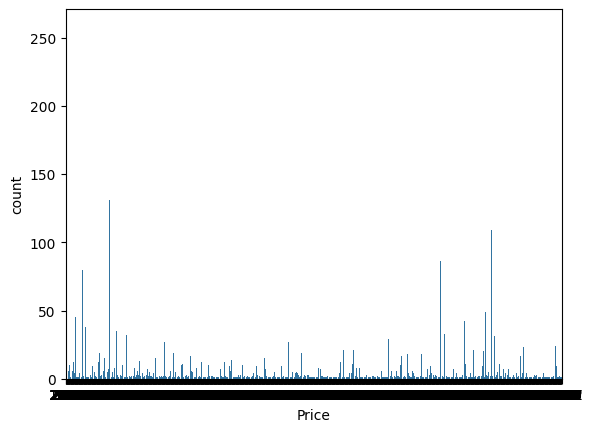

In [115]:
sns.countplot(x='Price',data=df)

<ipython-input-116-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

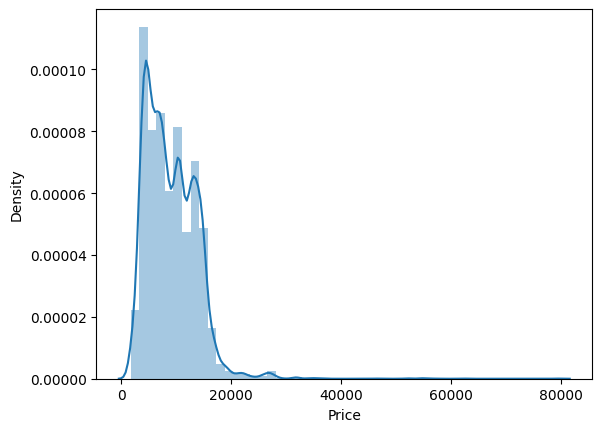

In [116]:
sns.distplot(df['Price'])

Price feature is Right skewed

In [117]:
df['Price'].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Insights : Average Price is approx 9k
Min flight price is 1.7k
Max flight price is 79k

In [118]:
df['Price'].skew()

1.8125523782189141

In [119]:
df['Price'].mode()

,Price
0,10262


In [120]:
df['Price'].median()

8372.0

In [121]:
df['Price'].mean()

9087.064120565385

<Axes: ylabel='Price'>

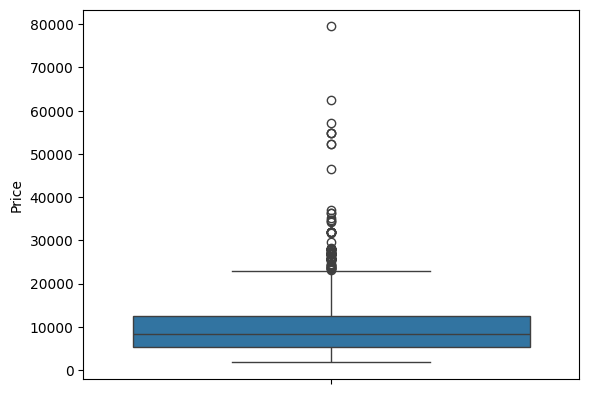

In [122]:
sns.boxplot(df['Price'])

Insights : Outlier is present there

<Axes: xlabel='Airline_Air Asia', ylabel='Duration_hour'>

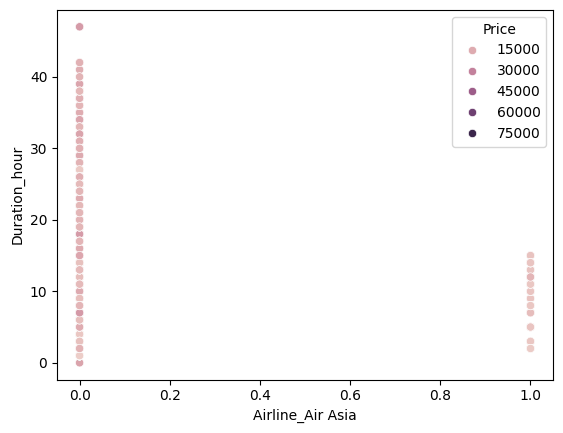

In [125]:
sns.scatterplot(x='Airline_Air Asia',y='Duration_hour',data=df,hue='Price')

In [126]:
df.corr()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603883,-0.009472,0.054389,NaN,0.038123,-0.106939,-0.061490,-0.002591,0.739872,...,-0.234761,0.490166,0.032745,-0.260757,0.032745,0.490166,-0.447394,-0.260757,-0.234761,-0.015310
Price,0.603883,1.000000,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.006819,-0.024492,0.508672,...,-0.179216,0.270619,0.009377,-0.230745,0.009377,0.270619,-0.313401,-0.230745,-0.179216,0.189785
Date,-0.009472,-0.153738,1.000000,-0.038378,NaN,-0.003192,-0.017511,0.002220,-0.008261,-0.022181,...,0.006626,0.099981,-0.060505,-0.014008,-0.060505,0.099981,0.002662,-0.014008,0.006626,-0.075225
Month,0.054389,-0.103651,-0.038378,1.000000,NaN,-0.003941,-0.100626,0.039112,-0.059238,0.016175,...,0.005646,0.139240,0.087161,-0.039358,0.087161,0.139240,0.090480,-0.039358,0.005646,-0.453689
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_hour,0.038123,0.024264,-0.003192,-0.003941,NaN,1.000000,-0.154362,0.005215,0.043054,0.055180,...,-0.014783,-0.006859,0.054727,-0.033495,0.054727,-0.006859,-0.030844,-0.033495,-0.014783,0.000384
Arrival_min,-0.106939,-0.086155,-0.017511,-0.100626,NaN,-0.154362,1.000000,0.067909,-0.017594,-0.074439,...,-0.030493,-0.209867,0.118570,0.081196,0.118570,-0.209867,0.095249,0.081196,-0.030493,0.021270
Dep_Time_hour,-0.061490,0.006819,0.002220,0.039112,NaN,0.005215,0.067909,1.000000,-0.024806,0.002783,...,-0.014835,-0.118836,0.155500,-0.017277,0.155500,-0.118836,0.009489,-0.017277,-0.014835,-0.022120
Dep_Time_min,-0.002591,-0.024492,-0.008261,-0.059238,NaN,0.043054,-0.017594,-0.024806,1.000000,-0.021946,...,0.067086,-0.085405,-0.024298,0.037675,-0.024298,-0.085405,0.003162,0.037675,0.067086,0.107091
Duration_hour,0.739872,0.508672,-0.022181,0.016175,NaN,0.055180,-0.074439,0.002783,-0.021946,1.000000,...,-0.186675,0.299931,0.123424,-0.233338,0.123424,0.299931,-0.346205,-0.233338,-0.186675,0.004008


<Axes: >

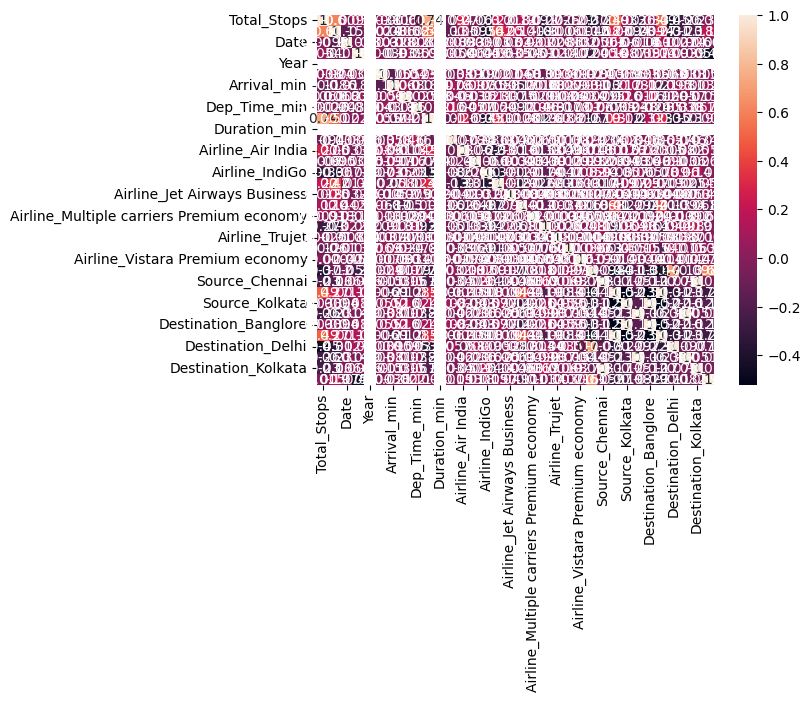

In [127]:
sns.heatmap(df.corr(),annot=True)

Insights : price features are positively co-related with source,destination,destination,destination time
as it will increase price will also increase